## Importando todas as bibliotecas necessárias

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt
import somoclu
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')

## Importando e tratando os dados do csv
- 569 amostras

In [4]:
# lendo os dados do csv
df = pd.read_csv(
    filepath_or_buffer='data.csv', 
    header=None, 
    sep=',')

# renomeando as colunas de acordo com os dados da primeira linha
df = df.rename(columns=df.iloc[0])

# retirando a linha que contém os labels
df = df.iloc[1:]

# retirando as colunas diagnosis e id
df = df.drop(['id'], axis=1)

# retirando as colunas que tiverem valores NaN
df = df.dropna(axis='columns')

# Dividindo o dataset para validação cruzada e mais alguns ajustes
- Grupo de teste = 189
- Grupo de treinamento = 380
- Total = 569

In [5]:
data_test = df.sample(n=180)
data_train = df.drop(data_test.index)

# Substituindo Maligno por 0 e Benigno por 1 e convertendo para array
# os labels separados serão utilizados para treinamento supervisionado
l_test = data_test['diagnosis'].replace(['M','B'], [1,0])
l_train = data_train['diagnosis'].replace(['M','B'], [1,0])

# convertendo os labels para um array
l_test = np.array(l_test, dtype=pd.Series)
l_train = np.array(l_train, dtype=pd.Series)

#removendo a coluna diagnosis
data_test = data_test.drop(['diagnosis'], axis=1)
data_train = data_train.drop(['diagnosis'], axis=1)

# criando um set de variáveis normalizadas
d_test_norm = preprocessing.normalize(data_test)
d_train_norm = preprocessing.normalize(data_train)

data_train = data_train.values
data_test = data_test.values

l_test

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0], dtype=object)

## Principal component analysis (PCA) no SKLearn

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [6]:
# Definição do objeto PCA, restringindo a apenas duas componentes, para melhor visualização
pca = PCA(n_components=6)
data_2d = StandardScaler().fit_transform(data_train)
data_2d = pca.fit_transform(data_2d)

#pca_test = PCA(n_components=10)
#pca_test.fit(data_test) # treinamento do PCA

pca_test = PCA(n_components=6)
data_2d_test = StandardScaler().fit_transform(data_test)
data_2d_test = pca_test.fit_transform(data_2d_test)

/home/iagodiogenes/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Extraindo algumas informações do PCA

In [7]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
pca_c = pca.components_
pca_c_test = pca_test.components_

# percentual de cada dimensão
pca_perc = pca.explained_variance_ratio_
pca_perc_test = pca_test.explained_variance_ratio_

print('\nConjunto de Treinamento: \n')
print('Número de Componentes: ',pca.n_components_)
print('Contribuições de cada componente: ', pca_perc*100)
print('\nConjunto de teste: \n')
print('Número de Componentes: ',pca_test.n_components_)
print('Contribuições de cada componente: ', pca_perc_test*100)


Conjunto de Treinamento: 

Número de Componentes:  6
Contribuições de cada componente:  [44.92072716 18.59850664  9.4139303   6.90034169  5.72967823  3.81488904]

Conjunto de teste: 

Número de Componentes:  6
Contribuições de cada componente:  [43.76239078 20.32577581  9.15392691  5.94633393  4.80912451  4.25471373]


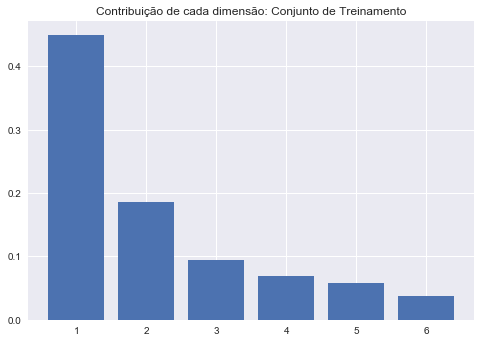

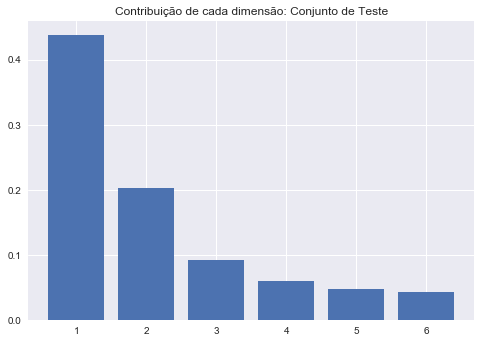

In [51]:
# Plot da contribuição de cada dimensão
plt.bar(np.arange(1,7),pca_perc)
plt.title('Contribuição de cada dimensão: Conjunto de Treinamento')
plt.show()

# Plot da contribuição de cada dimensão
plt.bar(np.arange(1,7),pca_perc_test)
plt.title('Contribuição de cada dimensão: Conjunto de Teste')
plt.show()

# Treinando com o Kmeans pós-PCA

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 30.2 ms


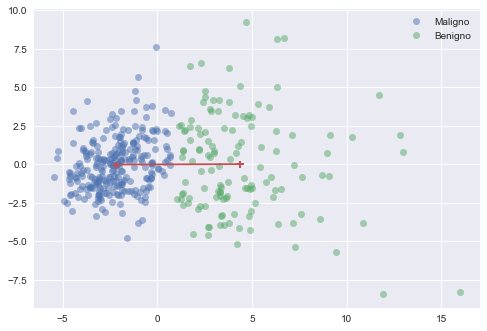

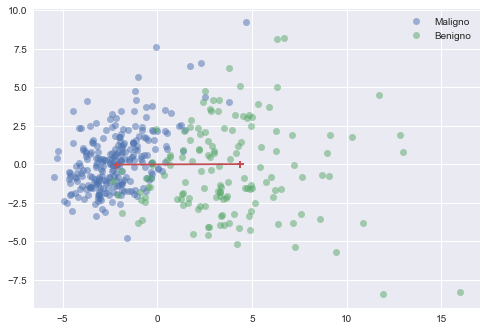

In [9]:
%time k1 = KMeans(n_clusters=2, random_state=0,  max_iter=1000, tol=1e-5).fit(data_2d)
l_k1 = k1.labels_ # labels

# posição dos centros dos clusters
c = k1.cluster_centers_

# plot dos clusters
fig1 = plt.figure()
plt.plot(data_2d[l_k1==0,0], data_2d[l_k1==0,1], 'o', alpha=0.5)
plt.plot(data_2d[l_k1==1,0], data_2d[l_k1==1,1], 'o', alpha=0.5)
plt.plot(c[:, 0], c[:, 1],marker='P')
plt.legend(['Maligno','Benigno'])
plt.show()

# plot dos clusters originais
fig1 = plt.figure()
plt.plot(data_2d[l_train==0,0], data_2d[l_train==0,1], 'o', alpha=0.5)
plt.plot(data_2d[l_train==1,0], data_2d[l_train==1,1], 'o', alpha=0.5)
plt.plot(c[:, 0], c[:, 1],marker='P')
plt.legend(['Maligno','Benigno'])
plt.show()

## Calculando o número de acertos do Kmeans

In [10]:
count = 0
for i in range(0,len(l_k1)):
    if (l_k1[i]==l_train[i]):
        count += 1

print(count)
print('Acertos: ', 100*count/len(l_k1))

358
Acertos:  92.03084832904884


## Prevendo com os dados de teste

In [11]:
l_k1_predicted = k1.predict(data_2d_test)

count = 0
for i in range(0,len(l_k1_predicted)):
    if (l_k1_predicted[i]==l_test[i]):
        count += 1

print(count)
print('Acertos: ', 100*count/len(l_k1_predicted))

160
Acertos:  88.88888888888889


## Usando o Kmeans sem o PCA

Como a dimensão é muito alta, será apenas calculado o número de acertos

In [12]:
%time k2 = KMeans(n_clusters=2, random_state=200,  max_iter=1000,tol=1e-5).fit(data_train)
l_semPCA = k2.labels_ # labels

CPU times: user 64 ms, sys: 108 ms, total: 172 ms
Wall time: 28.3 ms


In [13]:
count2 = 0
for i in range(0,len(l_semPCA)):
    if (l_semPCA[i]==l_train[i]):
        count2 += 1

print(count2)
print('Acertos: ', count2/len(l_semPCA))

324
Acertos:  0.8329048843187661


## Prevendo com os dados de teste

In [14]:
l_k2_predicted = k2.predict(data_test)

count = 0
for i in range(0,len(l_k2_predicted)):
    if (l_k2_predicted[i]==l_test[i]):
        count += 1

print(count)
print('Acertos: ', count/len(l_k2_predicted))

160
Acertos:  0.8888888888888888


## Definindo uma função de plot para o Keras

In [15]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    ymin, ymax = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

## Resolvendo o problema de classificação com uma MLP, sem o PCA

CPU times: user 4.46 s, sys: 372 ms, total: 4.83 s
Wall time: 3.16 s


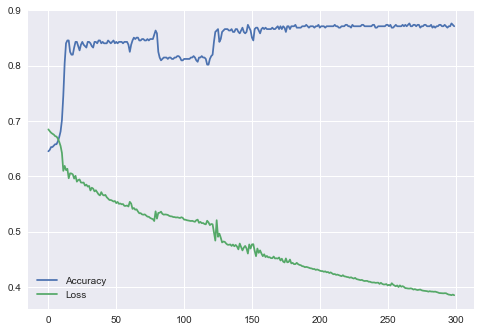

Precisão =  87.14652850572739


In [18]:
model1 = Sequential()

model1.add(Dense(4, input_shape=(30,), activation='relu'))
model1.add(Dense(2, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# rótulos para treinamento
y_train = l_train
ep = 300

%time history1 = model1.fit(data_train, y_train, epochs=ep, batch_size=100, verbose = 0)

plt.plot(history1.history['acc'],label='Accuracy')
plt.plot(history1.history['loss'],label='Loss')
plt.legend()
plt.show()

print('Precisão = ',history1.history['acc'][ep-1]*100)

# Prevendo com os dados de teste

In [19]:
model1_pred = model1.predict(data_test,verbose=1)

for i in np.arange(0,len(model1_pred)):
    if model1_pred[i] > 0.5:
        model1_pred[i] = 1
    else:
        model1_pred[i] = 0
        
count = 0
for i in range(0,len(model1_pred)):
    if (model1_pred[i]==l_test[i]):
        count += 1

print(count)
print('Acertos: ', 100*count/len(model1_pred))

180/180 [==============================] - 0s 306us/step
164
Acertos:  91.11111111111111


## Usando a mesma MLP, após o PCA

CPU times: user 3.84 s, sys: 488 ms, total: 4.33 s
Wall time: 2.61 s


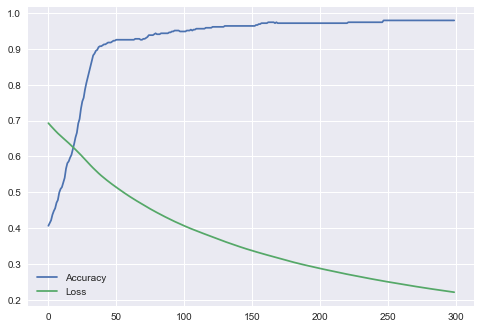

Precisão =  97.94344613974995


In [20]:
model2 = Sequential()

model2.add(Dense(4, input_shape=(6,), activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# rótulos para treinamento
y_train = l_train
ep = 300

%time history = model2.fit(data_2d, y_train, epochs=ep, batch_size=100, verbose = 0)

plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.show()

print('Precisão = ',history.history['acc'][ep-1]*100)

#plot_decision_boundary(data_2d, y_train, model2, cmap=plt.cm.coolwarm)
#plt.show()

# Prevendo com os dados de teste

In [21]:
model2_pred = model2.predict(data_2d_test,verbose=1)

for i in np.arange(0,len(model2_pred)):
    if model2_pred[i] > 0.5:
        model2_pred[i] = 1
    else:
        model2_pred[i] = 0
        
count = 0
for i in range(0,len(model2_pred)):
    if (model2_pred[i]==l_test[i]):
        count += 1

print(count)
print('Acertos: ', count/len(model2_pred))

180/180 [==============================] - 0s 340us/step
169
Acertos:  0.9388888888888889


## Usando Deep Learning, após PCA

CPU times: user 2.31 s, sys: 124 ms, total: 2.44 s
Wall time: 1.83 s


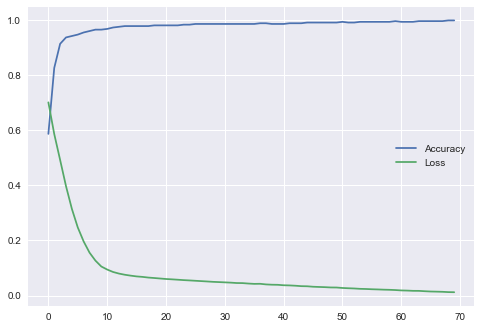

Precisão =  99.74293083642013


In [31]:
model3 = Sequential()

model3.add(Dense(128, input_shape=(6,), activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(18, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# rótulos para treinamento
y_train = l_train
ep = 70

%time history = model3.fit(data_2d, y_train, epochs=ep, batch_size=100, verbose = 0)

plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.show()

print('Precisão = ',history.history['acc'][ep-1]*100)

#plot_decision_boundary(data_2d, y_train, model3, cmap=plt.cm.coolwarm)
#plt.show()

# Prevendo com os dados de teste

In [32]:
model3_pred = model3.predict(data_2d_test,verbose=1)

for i in np.arange(0,len(model3_pred)):
    if model3_pred[i] > 0.5:
        model3_pred[i] = 1
    else:
        model3_pred[i] = 0
        
count = 0
for i in range(0,len(model3_pred)):
    if (model3_pred[i]==l_test[i]):
        count += 1

print(count)
print('Acertos: ', count/len(model3_pred))

180/180 [==============================] - 0s 897us/step
168
Acertos:  0.9333333333333333


## Usando a SVM

In [48]:
y_train = l_train

data_2d = data_2d.astype('int')
data_test = data_test.astype('float')
y_train = y_train.astype('int')

model = svm.SVC(kernel='poly',degree=1)
%time model.fit(data_2d, y_train)

#Predict Output
predicted = model.predict(data_2d_test)

print(predicted)

#plot_decision_boundary(data_2d_test, l_test, model, cmap=plt.cm.coolwarm)
#plt.show()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.45 ms
[1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0]


In [49]:
count3 = 0
for i in range(0,len(predicted)):
    if (predicted[i]==l_test[i]):
        count3 += 1

print(count3)
print('Acertos: ', count3/len(predicted))

169
Acertos:  0.9388888888888889
